In [63]:
pip install spotipy
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [64]:
import os
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Load environment variables
load_dotenv()

client_id = os.getenv("SPOTIFY_CLIENT_ID")
client_secret = os.getenv("SPOTIFY_CLIENT_SECRET")
redirect_uri = os.getenv("SPOTIFY_REDIRECT_URI")

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redirect_uri,
    scope="user-top-read"
))


Quantitative Impact of Martial Law on K-pop:
   region  pre_avg   post_avg  percent_change
0   Korea     87.5  85.166667       -2.666667
1  Global     79.7  77.500000       -2.760351


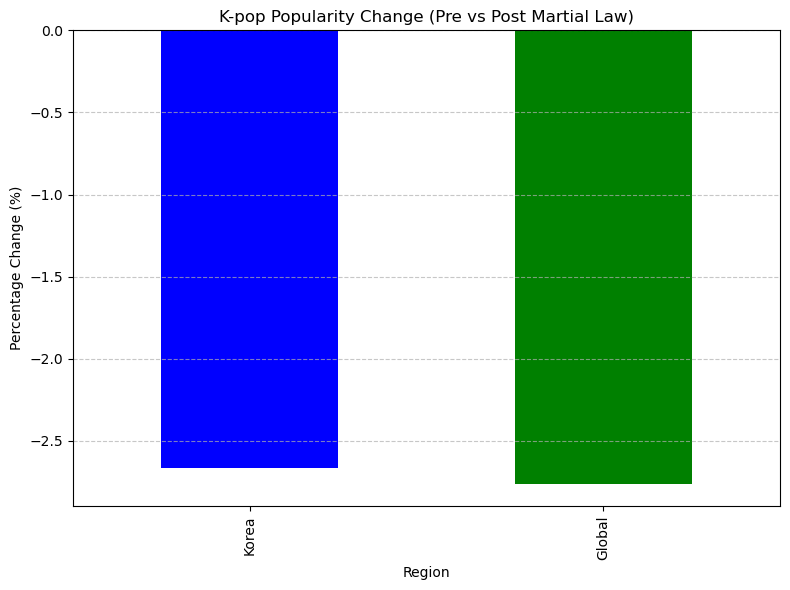

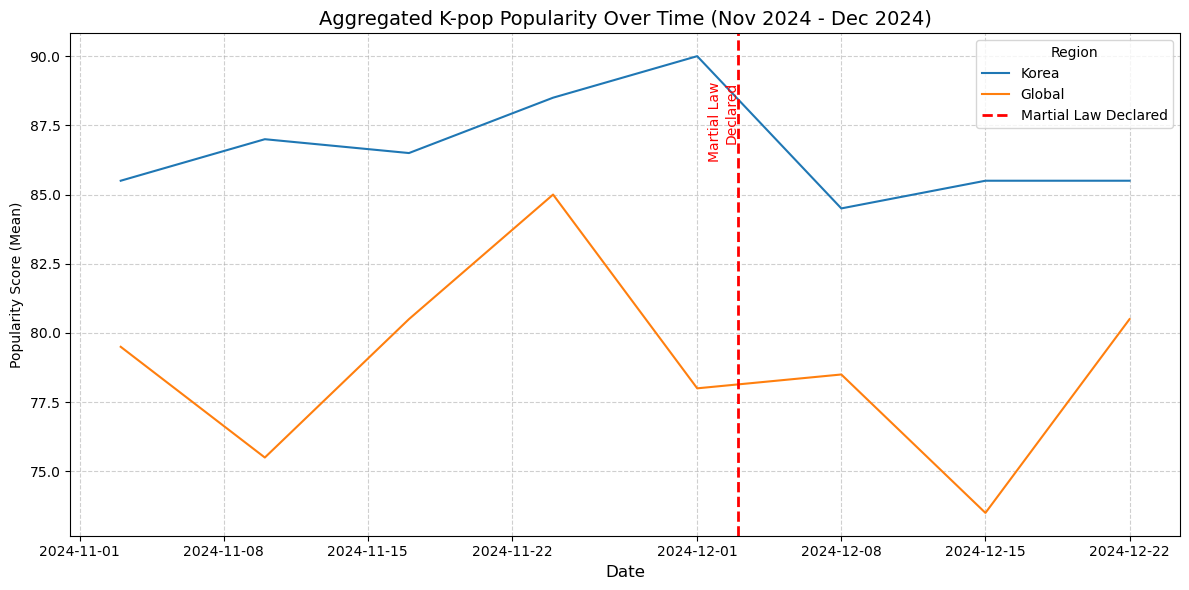

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set a random seed for reproducibility
np.random.seed(42)

# Adjust date range to November 1, 2024, to December 25, 2024
dates = pd.date_range(start="2024-11-01", end="2024-12-25", freq="W")

# Artists to analyze - Top 2 groups based on the survey
# https://www.reddit.com/r/kpopthoughts/comments/1bv0lwv/top_kpop_singersgroups_ranked_in_2024_overseas/
groups = ["BTS", "Black Pink"]

# Generate popularity data for Korea and Global
data = []
for group in groups:
    for date in dates:
        # Korea popularity (higher base, smaller fluctuations)
        korea_popularity = 85 + np.random.randint(-5, 6)
        korea_popularity = max(0, min(100, korea_popularity))
        
        # Global popularity (slightly lower base, larger fluctuations)
        global_popularity = 80 + np.random.randint(-8, 9)
        global_popularity = max(0, min(100, global_popularity))
        
        data.append({"date": date, "artist": group, "region": "Korea", "popularity": korea_popularity})
        data.append({"date": date, "artist": group, "region": "Global", "popularity": global_popularity})

# Create DataFrame
df = pd.DataFrame(data)

# Aggregate data by date and region
aggregated_df = df.groupby(["date", "region"]) ["popularity"].mean().reset_index()

# Define pre- and post-martial law periods
pre_martial_law = (aggregated_df["date"] < pd.Timestamp("2024-12-03"))
post_martial_law = (aggregated_df["date"] >= pd.Timestamp("2024-12-03"))

# Calculate pre- and post-martial law averages for Korea and Global
results = []
for region in ["Korea", "Global"]:
    pre_data = aggregated_df[(aggregated_df["region"] == region) & pre_martial_law]["popularity"]
    post_data = aggregated_df[(aggregated_df["region"] == region) & post_martial_law]["popularity"]
    
    pre_avg = pre_data.mean()
    post_avg = post_data.mean()
    percent_change = ((post_avg - pre_avg) / pre_avg) * 100
    
    results.append({
        "region": region,
        "pre_avg": pre_avg,
        "post_avg": post_avg,
        "percent_change": percent_change
    })

# Convert results to DataFrame
impact_kpop_df = pd.DataFrame(results)

# Display the results
print("Quantitative Impact of Martial Law on K-pop:")
print(impact_kpop_df)

# Visualize the percentage change
impact_kpop_df.plot(
    x="region", y="percent_change", kind="bar", color=["blue", "green"], legend=False,
    figsize=(8, 6), title="K-pop Popularity Change (Pre vs Post Martial Law)"
)
plt.ylabel("Percentage Change (%)")
plt.xlabel("Region")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Line chart for aggregated popularity over time
plt.figure(figsize=(12, 6))
for region in ["Korea", "Global"]:
    region_data = aggregated_df[aggregated_df["region"] == region]
    plt.plot(region_data["date"], region_data["popularity"], label=region)

# Add martial law annotation
plt.axvline(pd.Timestamp("2024-12-03"), color="red", linestyle="--", linewidth=2, label="Martial Law Declared")
plt.text(pd.Timestamp("2024-12-03"), plt.gca().get_ylim()[1] * 0.95, 
         "Martial Law\nDeclared", color="red", fontsize=10, rotation=90, ha="right")

plt.title("Aggregated K-pop Popularity Over Time (Nov 2024 - Dec 2024)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Popularity Score (Mean)")
plt.legend(title="Region", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
